## Analyze A/B Test Results
## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [220]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [221]:
df=pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [222]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [223]:
df["user_id"].nunique()

290584

d. The proportion of users converted.

In [224]:
df[df["converted"]==1].shape[0]/df["converted"].shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [225]:
treat=df[df["group"]=="treatment"]
t=treat[treat["landing_page"]!="new_page"].shape[0]
new_p=df[df["landing_page"]=="new_page"]
n_p=new_p[new_p["group"]!="treatment"].shape[0]
print(n_p+t)

3893


f. Do any of the rows have missing values?

In [226]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [227]:
df2=df[((df["group"]=="treatment")&(df["landing_page"]=="new_page") )|((df["group"]=="control")&(df["landing_page"]!="new_page") )]


In [228]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [229]:
df2["user_id"].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [230]:
df2[df2["user_id"].duplicated()]["user_id"]

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [231]:
dup_info=df2[df2["user_id"].duplicated()]
dup_info

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [232]:
print(df2.shape[0])
df2.drop_duplicates(subset="user_id",keep='first', inplace=True)
print(df2.shape[0])

290585
290584


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [233]:
df2[df2["converted"]==1].shape[0]/df2["converted"].shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [234]:
control=df2[df2["group"]=="control"]
control[control["converted"]==1].shape[0]/control["converted"].shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [235]:
treatment=df2[df2["group"]=="treatment"]
treatment[treatment["converted"]==1].shape[0]/treatment["converted"].shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [236]:
p_t=df2[df2["group"]=="treatment"].shape[0]/df2.shape[0]
p_c=df2[df2["group"]=="control"].shape[0]/df2.shape[0]
p_npage_c=control[control["landing_page"]=="new_page"].shape[0]/control["landing_page"].shape[0]
p_npage_t=treatment[treatment["landing_page"]=="new_page"].shape[0]/treatment["landing_page"].shape[0]
print(p_t*p_npage_t + p_c*p_npage_c)

0.5000619442226688


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

## I think the provided information may not be sufficient as we have not tested our hypothesis 
## testing our hypothesis requires calculating the p value to judge


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

## H0 : Pnew <= Pold   
## H1 : Pnew > Pold     

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [237]:
p_new_null=df2[df2["converted"]==1].shape[0]/df2["converted"].shape[0]
p_new_null

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [238]:
p_old_null=p_new_null  # as given in above cells
p_old_null

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [239]:
n_new=treatment.shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [240]:
n_old=control.shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [256]:
#randomly generated array of 1,0 with prop.=p_new_null

new_page_converted=np.random.choice([1,0],size=n_new,p=[p_new_null,1-p_new_null])
# same as np.random.binomial(1,p_new_null,n_new)
new_page_converted[0:10]

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [257]:
old_page_converted=np.random.choice([1,0],size=n_old,p=[p_old_null,1-p_old_null])
# same as np.random.binomial(1,p_old_null,n_old)
old_page_converted[0:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [258]:
p_new_sim=len(new_page_converted[new_page_converted>0])/len(new_page_converted)
p_old_sim=len(old_page_converted[old_page_converted>0])/len(old_page_converted)
obs=p_new_sim-p_old_sim
print(obs)

0.0011336659630280105


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [259]:
p_diffs=[]
for i in range(10000):
    new_page_converted=np.random.choice([1,0],size=n_new,p=[p_new_null,1-p_new_null])
    
    length1=len(new_page_converted)
    
    ones=len(new_page_converted[new_page_converted>0])
    
    p_new_sim=ones/length1
    
    #------------------
    
    old_page_converted=np.random.choice([1,0],size=n_new,p=[p_old_null,1-p_old_null])
    
    length1=len(old_page_converted)
    
    ones=len(old_page_converted[old_page_converted>0])
    
    p_old_sim=ones/length1
    
    #--------------
    
    p_diffs.append(p_new_sim-p_old_sim)

# ^^  seems complicated ? nevermind just repeating the same cells i used before



p_diffs=np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

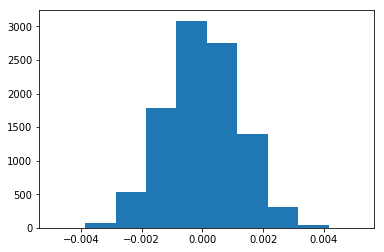

In [260]:
plt.hist(p_diffs);

### yes, it matched the expectations as according to centeral limit theorem the sampling distribution should follow normal distribution   

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [261]:
(p_diffs>obs).mean()

0.17849999999999999

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

## the value calculated in j is called P value 
### since P>0.05 then we fail to reject the null hypothesis
### which means there might be no difference between the old and the new page 

# ------------------------------------------------------

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [262]:
import statsmodels.api as sm

old_page=df2[df2["landing_page"]=="old_page"]
convert_old =old_page["converted"]

new_page=df2[df2["landing_page"]=="new_page"]
convert_new =new_page["converted"]

n_old =convert_old.shape[0] 
n_new = convert_new.shape[0]

convert_old=convert_old.sum()
convert_new=convert_new.sum()

print(n_old,n_new)

145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [263]:
z_statisitc,p_val=sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new])
print("z_score = ",z_statisitc," , p_value = ",p_val)

z_score =  1.31092419842  , p_value =  0.189883374482


### awesome ,the p value nearly matches the simulated value

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

### same meaning as before as the p value matched the previously calculated one (there is no significant difference between the old and the new pages)

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

### Logistic regression as the output is discerete

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [264]:
df2["intercept"]=1
df2[["to_be_dropped","ab_page"]]=pd.get_dummies(df2["group"])
df2.drop(labels="to_be_dropped",axis=1,inplace=True)
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [265]:
lg=sm.Logit(df2["converted"],df2[["intercept","ab_page"]])
model=lg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [266]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-03 22:55 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

### the P value = 0.1899 for the ab_page , the difference is too small to consider the two values different

### the null hypothesis is assuming the new conversion rate is less than or equal to the old one
### while
### the alternative hypothesis is predicting the new conversion rate is going to be higher than the older rate.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

### in my opinion we need to add other factors as we can see that the R squared coeff. is 0 or near 0 which means we need other factors to determine the relation 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [267]:
countries=pd.read_csv("countries.csv")
countries.head()

# we want to assign each user to his or her country
# so we make the index of both dataframes user_id then join them


df2 = df2.set_index('user_id').join(countries.set_index('user_id'))

In [272]:
df2["country"].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [273]:
df2[["US","CA","UK"]]=pd.get_dummies(df2["country"])


In [274]:
df2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,US,CA,UK
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [275]:
lg2=sm.Logit(df2["converted"],df2[["intercept","ab_page","US","CA"]])
res=lg2.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-03 23:00 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
US           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
CA            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

### by looking at the p values we may notice that these factors are insignificant

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [277]:
df2["UK_X_page"]=df2["UK"]*df2["ab_page"]
df2["US_X_page"]=df2["US"]*df2["ab_page"]
df2["CA_X_page"]=df2["CA"]*df2["ab_page"]

lg3=sm.Logit(df2["converted"],df2[["intercept","ab_page","US_X_page","CA_X_page"]])
res=lg3.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-03 23:06 AIC:              212778.9383
No. Observations:   290584           BIC:              212821.2568
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0183    0.0126    -1.4486  0.1475  -0.0430   0.0064
US_X_page    -0.0644    0.0384    -1.6788  0.0932  -0.1396   0.0108
CA_X_page     0.0257    0.0188     1.3634  0.1728  -0.0112   0.0625
==================================================================

"""

###  still no significance , let's try UK_X_page

In [278]:
lg4=sm.Logit(df2["converted"],df2[["intercept","ab_page","US_X_page","UK_X_page"]])
res=lg4.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-03 23:08 AIC:              212778.9383
No. Observations:   290584           BIC:              212821.2568
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page       0.0074    0.0180     0.4098  0.6819  -0.0279   0.0427
US_X_page    -0.0901    0.0405    -2.2252  0.0261  -0.1694  -0.0107
UK_X_page    -0.0257    0.0188    -1.3634  0.1728  -0.0625   0.0112
==================================================================

"""

## Finally , we got some interesting results the P value of US_X_page tells us that our results are now significant (p<alpha)

## ------------------------------------------------------------------------------------------------------------------------

<a id='conclusions'></a>
#### Conclusions were discussed for each situation individually


In [279]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0